# Question 1:
### Make a 9x9 numpy array filled with the repeating pattern 1,2,3,1,2,3,...

In [1]:
import numpy as np
print(np.tile([1,2,3] , 27).reshape((9,9)))

[[1 2 3 1 2 3 1 2 3]
 [1 2 3 1 2 3 1 2 3]
 [1 2 3 1 2 3 1 2 3]
 [1 2 3 1 2 3 1 2 3]
 [1 2 3 1 2 3 1 2 3]
 [1 2 3 1 2 3 1 2 3]
 [1 2 3 1 2 3 1 2 3]
 [1 2 3 1 2 3 1 2 3]
 [1 2 3 1 2 3 1 2 3]]


# Question 2:
### Write a function that performs min-max scaling on a numpy array across rows 

## Example:

### Input 
$\begin{bmatrix}1& 2& 3\\10 & 15 & 20 \\ -5 & -11&  9\end{bmatrix}$
    
### Output
$\begin{bmatrix} 0 & 0.5 & 1 \\ 0 & 0.5 & 1 \\ 0.3 & 0 & 1 \end{bmatrix}$


In [2]:
import numpy as np

a = np.array([[1,2,3] , [10,15,20] , [-5 , -11 , 9]] , dtype=np.float)
mins = np.min(a , axis = 1)
maxs = np.max(a , axis = 1)

for i in range(a.shape[0]) :
    a[i] = (a[i]-mins[i])/(maxs[i]-mins[i])

print(a)

[[0.  0.5 1. ]
 [0.  0.5 1. ]
 [0.3 0.  1. ]]


In [3]:
import numpy as np

a = np.array([[1,2,3] , [10,15,20] , [-5 , -11 , 9]])

mins = np.min(a , axis = 1).reshape(-1,1)
diff = (np.max(a,axis=1) - np.min(a,axis=1)).reshape(-1,1)
print((a-mins)/diff)

[[0.  0.5 1. ]
 [0.  0.5 1. ]
 [0.3 0.  1. ]]


# Question 3:
### Find index of the element of the array which is closest to a given value

## Example:

### Input 
$\begin{bmatrix}4.5& -5& 83\\5.11 & 5.25 & 20 \\ -5 & 42&  69.99\end{bmatrix}$
    
val = 5

### Output

index = (1, 0)


In [4]:
import numpy as np
import math

a = np.array([[4.5,-5,83] , [5.11,5.25,20] , [-5,42,69.99]] , dtype=np.float )
val = 5

mins = math.inf;
pos=0;
minpos = 0;

for x in np.nditer(a):
    if abs(x-val) < mins :
        mins = abs(x-val)
        minpos = pos
    pos += 1;
    
print(np.unravel_index(minpos,a.shape))

(1, 0)


In [5]:
import numpy as np

a = np.array([[4.5,-5,83] , [5.11,5.25,20] , [-5,42,69.99]] , dtype=np.float )
val = 5

print(np.unravel_index(np.argmin(np.absolute(a-val)) , a.shape))

(1, 0)


# Question 4:
### Implement A sliding window average of a given array

Example: https://www.youtube.com/watch?v=ZoaEDbivmOE

In [6]:
import numpy as np

a = np.random.randint(100 , size=(9,9))
b = np.zeros_like(a)

print(a)
print("-----------------------------------------------")

a = np.pad(a , (1,1) , 'edge')

for i in range(1,a.shape[0]-1) :
    for j in range(1,a.shape[1]-1):
        b[i-1,j-1] = np.average(a[ i-1 : i+2 , j-1 : j+2 ])
        
print(b)

[[19 83 94 21 42 72 20 86 88]
 [17 16 95 14  4 61  6  7 69]
 [33 81 91 82 34 57 52 13 43]
 [45 42 13 13 84 11 50 50 56]
 [12 22 83 39 64  1 87 93 51]
 [43 73 90 27 48 53 15 70 50]
 [29 82 12 38 53 91  4 49 41]
 [56 35 94 91 93  2  5 11 33]
 [31 52 24 41 72 18 66 73 15]]
-----------------------------------------------
[[32 57 57 47 38 37 47 52 74]
 [35 58 64 53 43 38 41 42 56]
 [36 48 49 47 40 39 34 38 45]
 [36 46 51 55 42 48 46 55 50]
 [37 47 44 51 37 45 47 58 58]
 [38 49 51 50 46 46 51 51 55]
 [49 57 60 60 55 40 33 30 42]
 [44 46 52 57 55 44 35 33 34]
 [41 44 50 61 49 45 36 39 31]]


# (Optional) Question 5
### Implement John Conway's Game of Life

You can read about the rules of the game and play it at: https://bitstorm.org/gameoflife/

In [7]:
import numpy as np

a = np.random.randint(2 , size=(10,10))
a = np.pad(a , (1,1) , "constant")


for _ in range(10):
    
    print(a)
    print("-----------------")
    
    b = np.zeros_like(a)
    
    for i in range(1,a.shape[0]-1) :
        for j in range(1,a.shape[1]-1):
            count = np.count_nonzero(a[i-1 : i+2 , j-1 : j+2])
            if a[i,j] :
                if count<3 or count>4 :
                    b[i,j]=0
                else:
                    b[i,j]=1
            else :
                if count==3 :
                    b[i,j]=1
                    
    a = np.copy(b)
                
    

[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 1 1 0 0 1 1 0 0 0]
 [0 0 0 0 1 1 0 1 0 0 0 0]
 [0 1 1 0 0 0 1 1 1 0 1 0]
 [0 1 1 0 0 1 0 0 1 1 1 0]
 [0 0 0 1 1 1 0 0 0 1 0 0]
 [0 0 1 0 1 0 0 0 0 1 1 0]
 [0 0 1 1 1 1 0 0 1 0 0 0]
 [0 0 1 0 0 1 0 0 0 1 0 0]
 [0 0 0 0 1 1 0 1 1 1 0 0]
 [0 0 1 0 1 1 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
-----------------
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 1 1 1 1 0 0 0]
 [0 1 0 0 1 1 0 0 0 1 0 0]
 [0 1 1 1 1 0 0 0 0 0 1 0]
 [0 1 0 0 0 1 0 0 0 0 1 0]
 [0 1 0 0 0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 1 1 1 0]
 [0 1 1 0 0 1 0 0 1 0 1 0]
 [0 0 1 0 0 0 0 1 0 1 0 0]
 [0 0 0 0 0 0 0 1 0 1 0 0]
 [0 0 0 1 1 1 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
-----------------
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 1 1 1 0 0 0]
 [0 1 0 0 0 0 0 1 1 1 0 0]
 [0 1 0 1 0 0 0 0 0 1 1 0]
 [0 1 0 1 0 1 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0 1 0]
 [0 0 1 0 0 0 0 0 1 0 1 0]
 [0 1 1 1 0 0 0 1 0 0 1 0]
 [0 1 1 0 0 0 1 1 0 1 1 0]
 [0 0 0 1 1 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 1 0 1 0 0 0]
 [0 0 0 0 0 0 0 0

# Final Task 
## Implement edge detection using a Sobel Filter
Read more about Sobel filter : [Wikipedia article](https://en.wikipedia.org/wiki/Sobel_operator "Sobel Operator")
Some sample code to display the results is already given



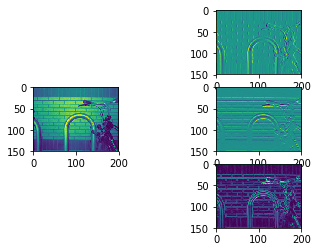

In [8]:
%matplotlib inline
# Note: DO NOT USE THE SCIPY INBUILT FUNCTION. CONVOLVE USING FILTERS AND NORMALIZE
import scipy
import imageio
import matplotlib.pyplot as plt
import numpy as np

im = imageio.imread('./fig01.jpg').astype("int32")
grey_img = None 

if(len(im.shape)==3) :
    grey_img = np.zeroes((im.shape[0] , im.shape[1]) , dtype=np.float)
    for i in range(im.shape[0]) :
        for j in range(im.shape[1]) :
            grey_img[i,j] = np.dot( im[i , j , :] , [0.2989 , 0.5870 , 0.1140] )
    im = np.copy(grey_img)

#grey_shape = list(im.shape)
#grey_shape[-1] = 1
#grey_shape = tuple(grey_shape)

#assert grey_img.shape == grey_shape
ax1 = plt.subplot(323)
ax2 = plt.subplot(322)
ax3 = plt.subplot(324)
ax4 = plt.subplot(326)

## Initializing the sobel filter
filterx = np.array([[3, 0 ,-3],
                      [10 , 0 , -10],
                      [3, 0 ,-3]])
filtery = filterx.T

## Fill the code below
filterx = np.fliplr(np.flipud(filterx))
filtery = np.fliplr(np.flipud(filtery))

padim = np.pad(im , (2,2) , "constant")

gx=np.zeros_like(im)
gy=np.zeros_like(im)

for i in range(2,padim.shape[0]-2) :
    for j in range(2,padim.shape[1]-2) :
        gx[i-2,j-2] = np.sum(filterx * padim[i-2 : i+1 , j-2 : j+1])
        gy[i-2,j-2] = np.sum(filtery * padim[i-2 : i+1 , j-2 : j+1])

dx = gx
dy = gy
mag =  np.sqrt(gx*gx + gy*gy)
normalized =  mag/float(np.max(mag))

## End
## Plot it
ax1.imshow(im)
ax2.imshow(dx)
ax3.imshow(dy)
ax4.imshow(normalized)
plt.show()

# All Done?
## Checkout these advanced guides

### [Advanced Numpy](https://scipy-lectures.org/advanced/advanced_numpy/index.html)
### [Image Processing](https://scipy-lectures.org/advanced/image_processing/index.html)